# Loading my basic libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas for data handling, numpy will be use for numerical operations, matplotlib and seaborn will be my libraries for visualizations

# Loading my data set from Kaggle (https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings)

In [9]:
file_path =  r"C:\Users\PawPaw\Desktop\Data Science Projects\Video Game Sales Data Set\Video_Games.csv"
data = pd.read_csv(r"C:\Users\PawPaw\Desktop\Data Science Projects\Video Game Sales Data Set\Video_Games.csv") #added r due to backslash in file path for both

# Basic Data Exploration

To begin, I'm going to do two things to ensure the data is solid. FIrst I want to cheeck for any missing values using "IsNull". 
Second, I'd like to do a basic summary of the stats of the dat by using .describe()

In [20]:
data.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [18]:
data.isnull().sum()

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

Based on the values from isnull, there seems to be some gaps in the data(Critic_Score, Critic_Count, User_Score, and User_Count ). So I will now begin first assessing what is missing from each column. 
Then I will do some data cleaning by dropping rows where name or genre are missing. Year of release and publisher may be difficult to dealth with so we'll use a placeholder "Unknown" for now until I can figure out how I'd like to move forward. 


In [24]:
data = data.dropna(subset=['Name', 'Genre'])

In [30]:
data.loc[:,'Publisher'] = data['Publisher'].fillna('Unknown')

Now I will be filling in the missing values for developer and rating with unknown similar to what I did above. 

In [35]:
data.loc[:,'Developer'] = data['Developer'].fillna('Unknown')
data.loc[:,'Rating'] = data['Rating'].fillna('Unknown')

There some missing data in the critic_score and user_score columns. So I will be using the median() to fill in the missing data as
fairly as possible. 

In [40]:
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].median())
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

TypeError: Cannot convert ['8' nan '8.3' ... '7.4' '8.8' nan] to numeric

So I got the following error you see above. It seems that user_score is stored as a string. To fix this, I will convert it into a numeric value

In [47]:
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')

In [49]:
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].median())
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

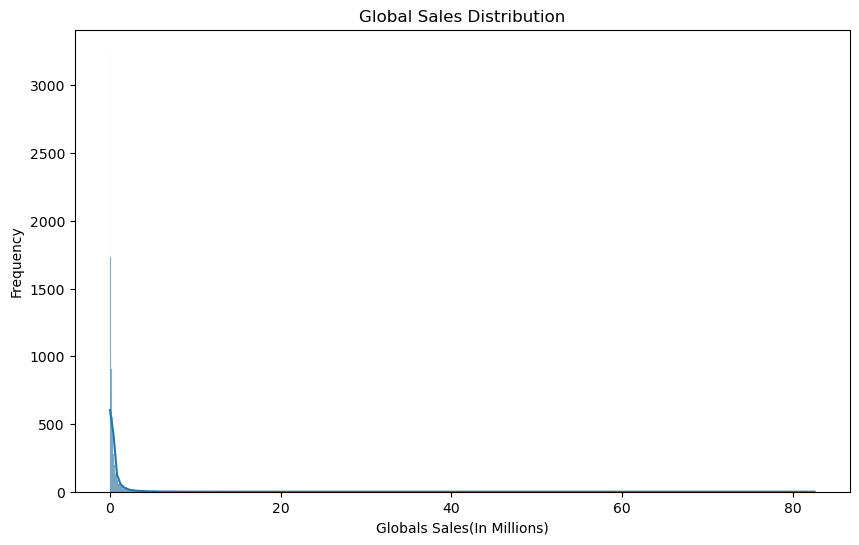

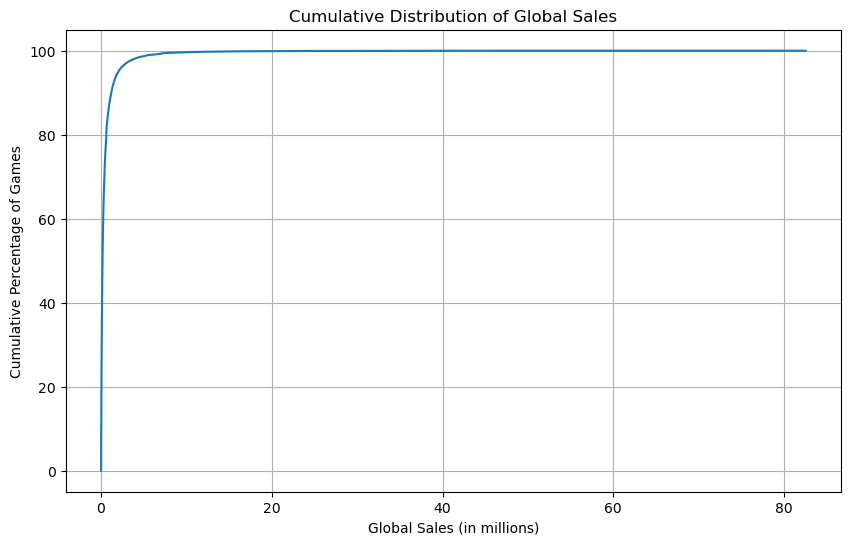

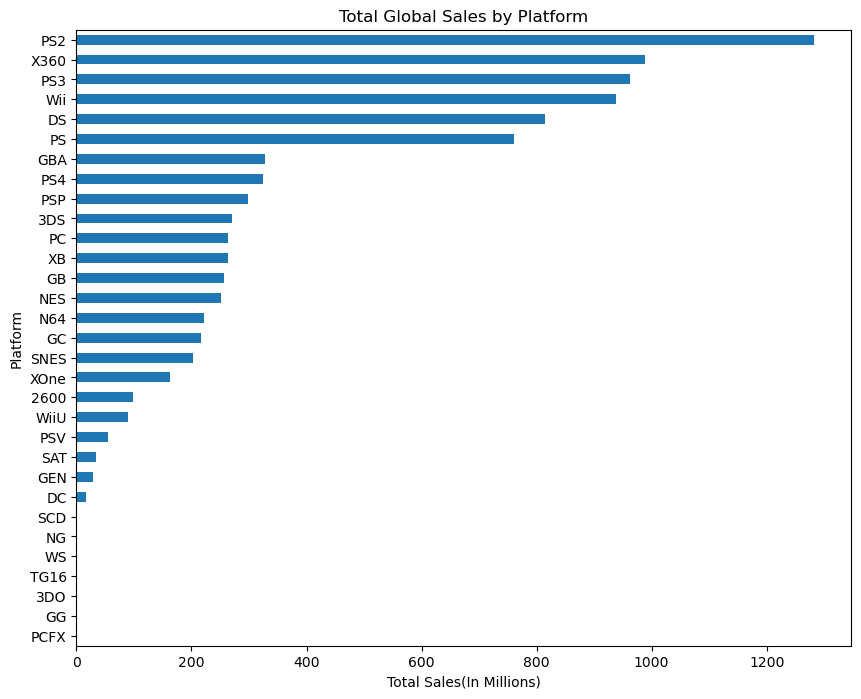

In [57]:
# Histogram of Global Sales
plt.figure(figsize=(10,6))
sns.histplot(data['Global_Sales'], kde=True)
plt.title("Global Sales Distribution")
plt.xlabel('Globals Sales(In Millions)')
plt.ylabel("Frequency")
plt.show()

sorted_sales = np.sort(data['Global_Sales'])
cumulative_percentage = np.arange(1, len(sorted_sales) + 1) / len(sorted_sales) * 100

# Plotting the cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot(sorted_sales, cumulative_percentage)
plt.title('Cumulative Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Cumulative Percentage of Games')
plt.grid(True)
plt.show()

# Total Global Sales by Platform
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values()
plt.figure(figsize=(10,8))
platform_sales.plot(kind='barh')
plt.title('Total Global Sales by Platform')
plt.xlabel('Total Sales(In Millions)')
plt.ylabel('Platform')
plt.show()

A few things to notice. First, the Playstation 2 in this data set is the leading platform followed by Xbox 360. With that said, a number of legacy modles were still selling large numbers of games such as the NES, N64, Game Gear, amoung others. There might be a few reasons for all of this, so let's investigate further.

## Regional Sales Breakdown

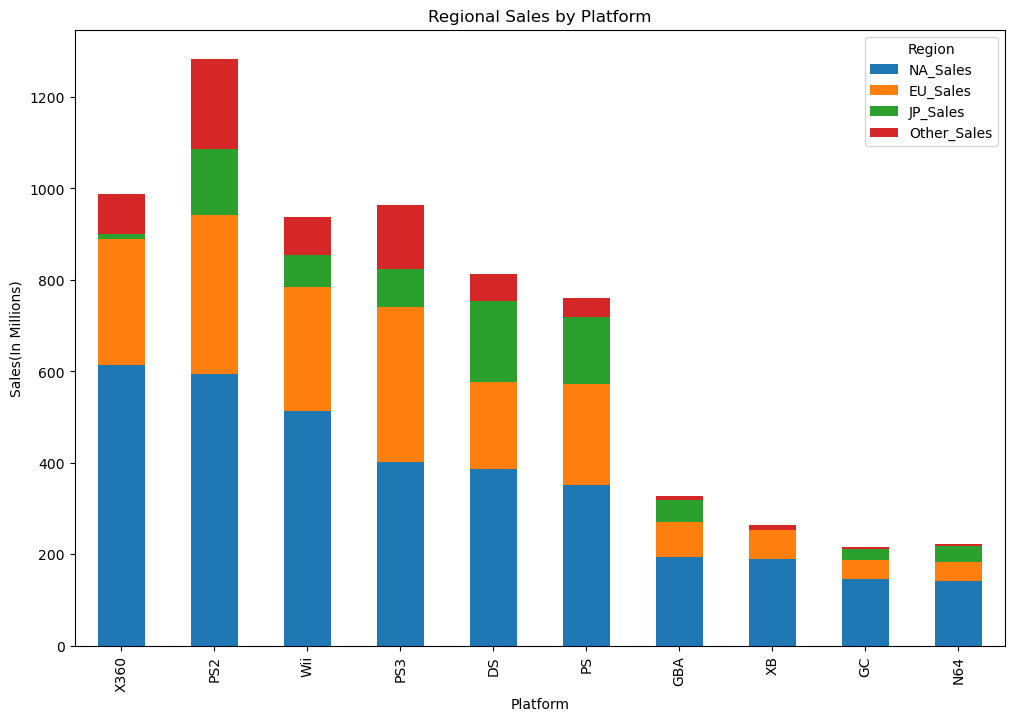

In [65]:
# Regional Sales Comparison for Top Platforms - set up
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
platform_region_sales = data.groupby('Platform')[regions].sum()

# Plotting
platform_region_sales.sort_values('NA_Sales', ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Regional Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales(In Millions)')
plt.legend(title='Region')
plt.show()

We can see another visualization of which platforms were popular during the time frame of this data set. We can also see that throughout the time period and across different platforms, North America is a significant market share of all the platforms. Okay, so the next item I'd like to explore are the popularity of each genre based on sales.

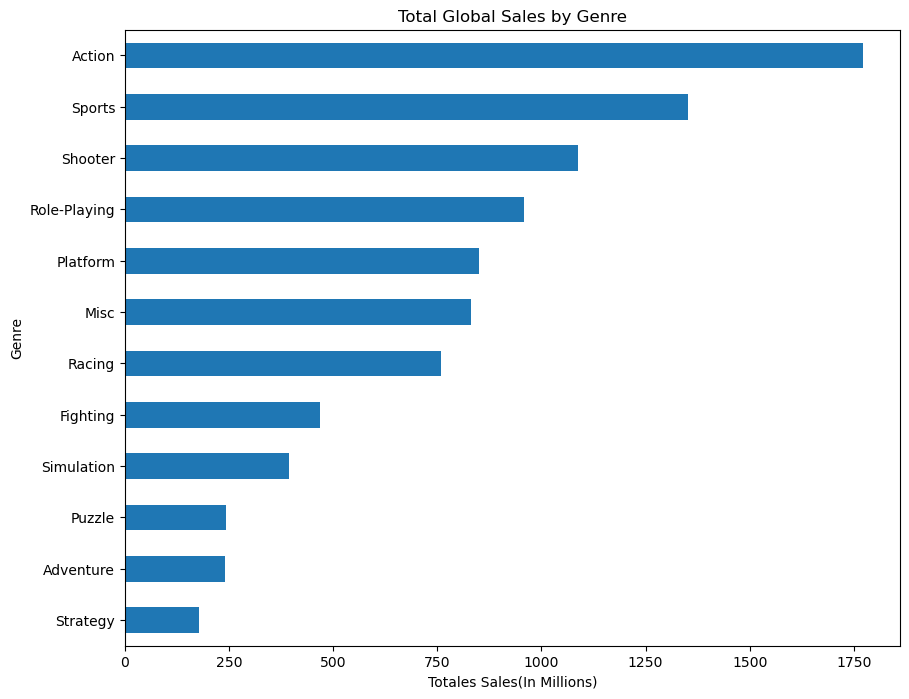

In [69]:
# Total Global Sales by Genre
genre_sales =  data.groupby('Genre')['Global_Sales'].sum().sort_values()
plt.figure(figsize=(10, 8))
genre_sales.plot(kind='barh')
plt.title('Total Global Sales by Genre')
plt.xlabel('Totales Sales(In Millions)')
plt.ylabel('Genre')
plt.show()

Interesting to see the line up of what is popular. The next item I'd like to explore are the critic/user scores vs sales of games. 

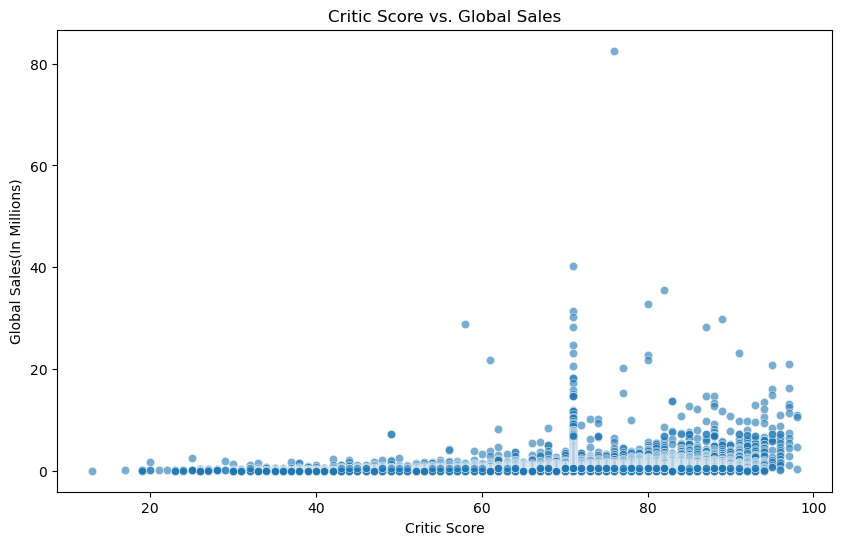

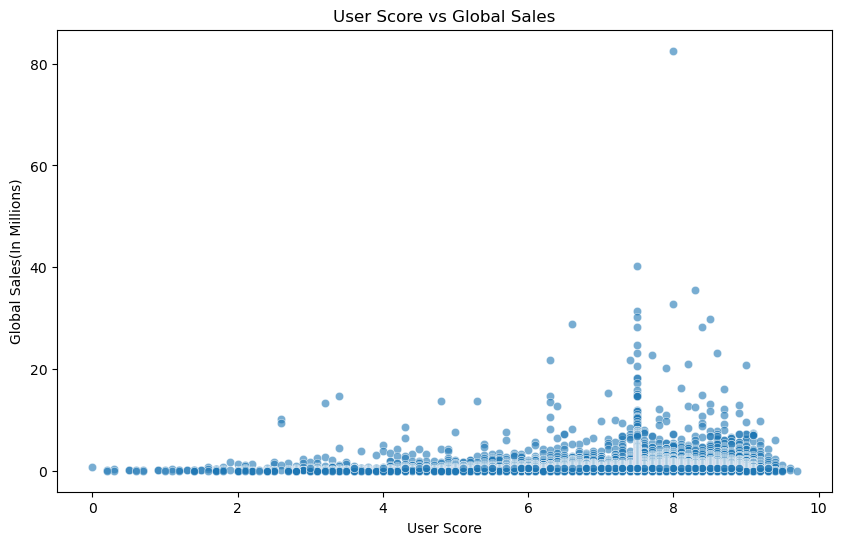

In [72]:
# Scatter Plot for Critic Score vs Global Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=data, alpha=0.6)
plt.title('Critic Score vs. Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales(In Millions)')
plt.show()

# Scatter Plot for User Score vs Global Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='User_Score', y='Global_Sales', data=data, alpha=0.6)
plt.title('User Score vs Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales(In Millions)')
plt.show()

Based on what I see above, my next question is, can we see any interesting patterns related to user score and genres? Maybe a certain genre has a better rate of resonating or having higher user satisfaction. So this will be our next visual focus. 

In [74]:
# Grouping by Genre to get average user score and total global sales. 
genre_analysis = data.groupby('Genre').agg({
    'User_Score': 'mean',
    'Global_Sales': 'sum'
})

# Sort for visualization clarity. 
genre_analysis = genre_analysis.sort_values(by='User_Score', ascending=False)
genre_analysis

,User_Score,Global_Sales
Genre,,
Role-Playing,7.558920,958.62
Puzzle,7.429381,243.65
Adventure,7.417212,240.21
Fighting,7.412630,467.91
Strategy,7.408273,178.22
Platform,7.400553,850.73
Simulation,7.353750,394.12
Misc,7.329442,830.19
Racing,7.265561,757.92


Let's now visualize this

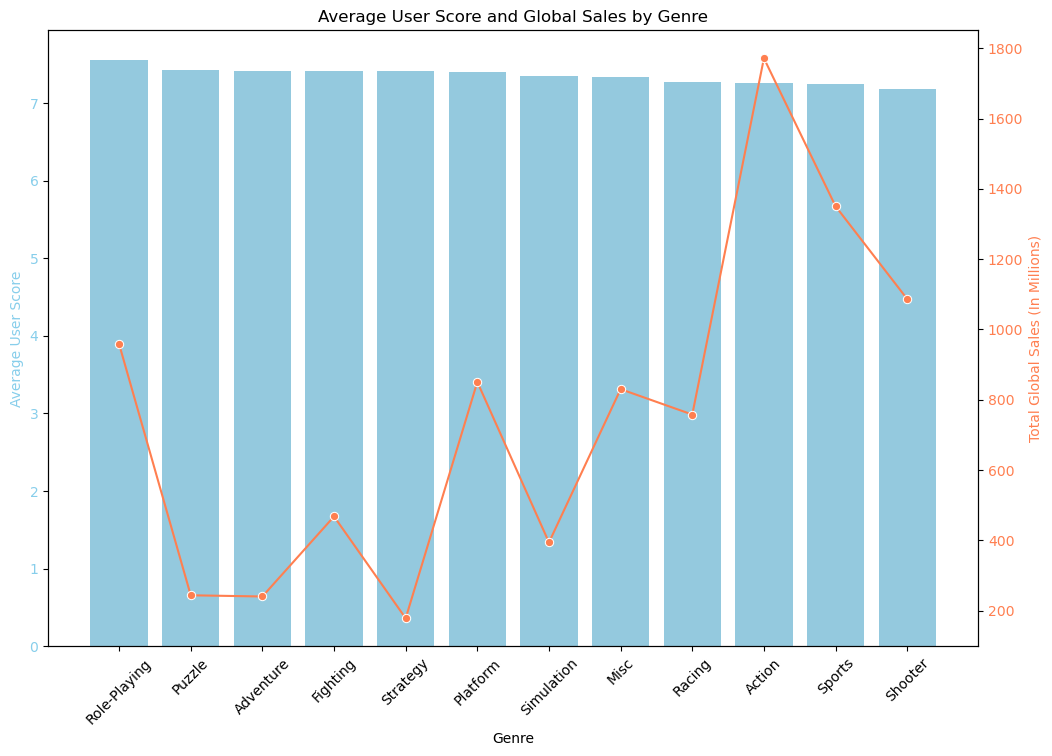

In [89]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting User Score (left y-axis)
sns.barplot(x='Genre', y='User_Score', data=genre_analysis, color='skyblue', ax=ax1)
ax1.set_ylabel('Average User Score', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Average User Score and Global Sales by Genre')
plt.xticks(rotation=45)

# Plotting Global Sales (Right y-axis)
ax2 = ax1.twinx()
sns.lineplot(x='Genre', y='Global_Sales', data=genre_analysis, color='coral', marker='o', ax=ax2)
ax2.set_ylabel('Total Global Sales (In Millions)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

plt.show()

This is interesting but doesn't give me a great deal of information. Let's explore now the relationship between genres and region. 

In [94]:
# Group by Genre and sum sales in each region. 
region_genre_sales = data.groupby('Genre')[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].sum().reset_index()
region_genre_sales = region_genre_sales.sort_values(by='NA_Sales', ascending=False)
region_genre_sales

,Genre,NA_Sales,JP_Sales,EU_Sales,Other_Sales
0,Action,893.89,163.51,526.25,187.03
10,Sports,696.96,135.81,381.26,135.84
8,Shooter,608.07,40.64,329.20,108.26
4,Platform,457.00,133.83,207.10,52.46
3,Misc,421.86,109.36,220.73,77.53
6,Racing,373.12,59.19,246.78,78.63
7,Role-Playing,338.81,363.56,194.68,61.81
2,Fighting,233.86,91.83,104.87,37.42
9,Simulation,184.87,63.80,114.36,30.94
5,Puzzle,122.88,57.93,50.01,12.38


Pretty cool stuff! So there seems to be some evidence that regional preference in terms of genre is true. So it's visualize it. 

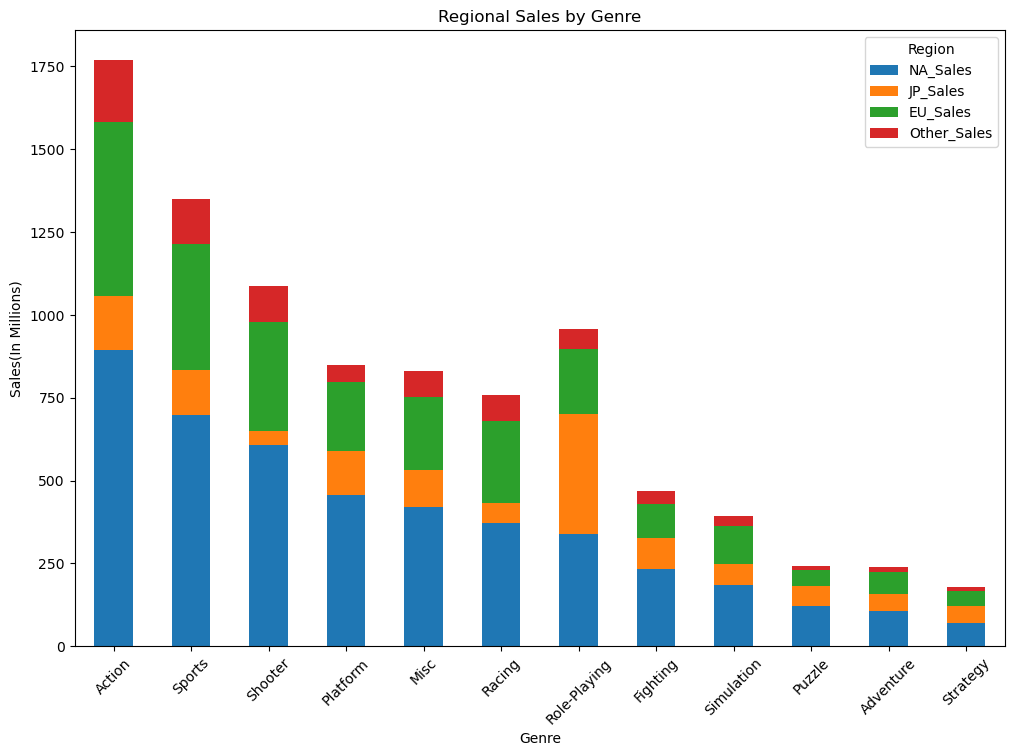

In [97]:
# Plotting stack bar chart for regional sales by genre. 
region_genre_sales.set_index('Genre', inplace=True)
region_genre_sales.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customizing the plot 
plt.title('Regional Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales(In Millions)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

Now I'd like to normalize genre sales by region and visualize it using a heatmap. 

In [100]:
# Calculate the precentage of sales by genre within each region
region_totals = region_genre_sales.sum(axis=0) #Sum total of sales for each region
region_genre_percent = region_genre_sales.div(region_totals) * 100 # Calulate percentage


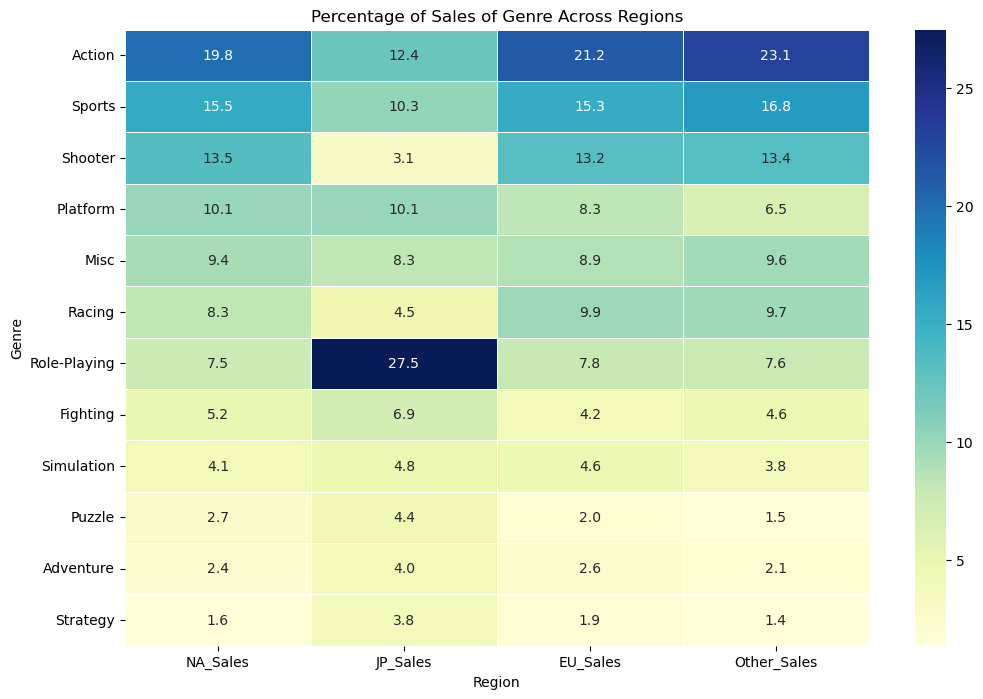

In [104]:
plt.figure(figsize=(12, 8))
sns.heatmap(region_genre_percent, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title('Percentage of Sales of Genre Across Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()

Based on the data set, I believe it's quite clear what genre is popular based on region.
To close this project, I will like to do an analysis on yearly trends to see if we can see any patterns. 

In [109]:
# Group data by year and genre, summing sales for each region. 
yearly_genre_sales = data.groupby(['Year_of_Release', 'Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
yearly_genre_sales.tail()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
385,2016.0,Sports,7.54,12.01,0.92,3.02
386,2016.0,Strategy,0.24,0.59,0.23,0.07
387,2017.0,Action,0.00,0.00,0.01,0.00
388,2017.0,Role-Playing,0.00,0.00,0.05,0.00
389,2020.0,Simulation,0.27,0.00,0.00,0.02


<function matplotlib.pyplot.show(close=None, block=None)>

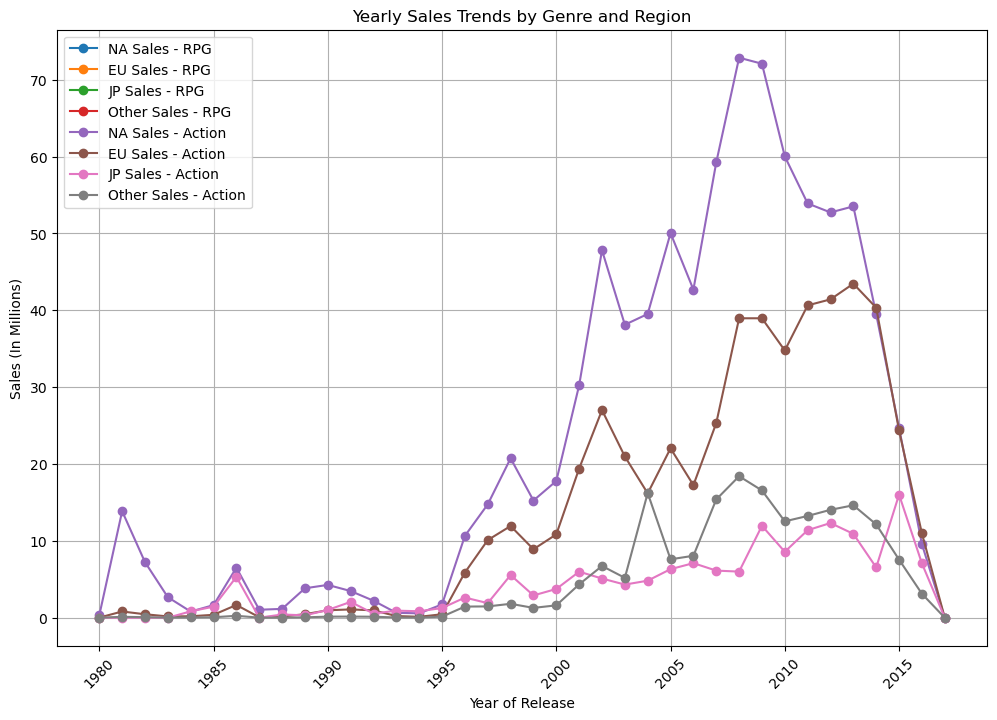

In [115]:
# Setting up a list of top genres to analyze
top_genres = ['RPG', 'Action']
# plotting yearly trends for each region and genre
plt.figure(figsize=(12, 8))

for genre in top_genres:
    genre_data = yearly_genre_sales[yearly_genre_sales['Genre'] == genre]

    # Plot for each region with a line chart
    plt.plot(genre_data['Year_of_Release'], genre_data['NA_Sales'], label=f'NA Sales - {genre}', marker='o')
    plt.plot(genre_data['Year_of_Release'], genre_data['EU_Sales'], label=f'EU Sales - {genre}', marker='o')
    plt.plot(genre_data['Year_of_Release'], genre_data['JP_Sales'], label=f'JP Sales - {genre}', marker='o')
    plt.plot(genre_data['Year_of_Release'], genre_data['Other_Sales'], label=f'Other Sales - {genre}', marker='o')

plt.title('Yearly Sales Trends by Genre and Region')
plt.xlabel('Year of Release')
plt.ylabel('Sales (In Millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show

# Summary of Video Game Sales Analysis

In this project, we conducted an in-depth analysis of video game sales across multiple dimensions, focusing on genre, region, and yearly trends. Here’s a summary of our findings:
## 1. Exploratory Data Analysis and Cleaning

    We began by examining and cleaning the data, addressing missing values in key columns such as Publisher, Critic_Score, and User_Score. This ensured a robust foundation for analysis.

## 2. Global Sales Distribution

    A histogram of global sales highlighted a highly skewed distribution, with most games selling relatively few copies and only a select few reaching blockbuster status.

## 3. Genre-Based Sales and Regional Preferences

    Through a breakdown of sales by genre, we identified unique regional preferences:
        Japan showed a strong preference for RPGs, underscoring the region’s long-standing cultural alignment with story-driven, character-focused games.
        North America and Europe demonstrated a significant affinity for Action games, likely influenced by the popularity of competitive and fast-paced gaming genres in Western markets.

## 4. Cross-Region Analysis with Genre

    A cross-region analysis highlighted how each genre performed relative to others in different regions, with Action, Sports, and Shooter genres gaining substantial traction in North America and Europe, while Japan remained consistent in its RPG preference.

## 5. Yearly Sales Trends by Genre and Region

    To close the analysis, we explored yearly sales trends for select genres across regions. This revealed changes in genre popularity over time:
        We observed that some genres showed steady growth, while others experienced periodic spikes, often coinciding with major game releases or shifts in market demand.

# Conclusion

This analysis provides a comprehensive view of video game sales patterns, offering insights into genre preferences across regions and highlighting how these preferences have evolved over time. The findings serve as a valuable resource for understanding the global video game market and could guide strategic decisions for publishers, developers, and marketers.